In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import (
    recall_score, 
    precision_score, 
    f1_score, 
    silhouette_score,
    davies_bouldin_score
)

In [2]:
# Clase contains which type of tissue is each
X = pd.read_csv('datasets/dataset_tissue.txt', index_col = 0).T
y = pd.read_csv('datasets/clase.txt', index_col = 0)

In [3]:
X_sc = MinMaxScaler().fit_transform(X)

In [4]:
# crear un diccionario para guardar la cantidad de vecinos y las distancias
neighbors_dict = dict()
# realizar las iteraciones
for n_neighbors in range(2, 10):
    neigh = NearestNeighbors(n_neighbors = n_neighbors)
    neigh.fit(X_sc)

    # las distancias vendrian a hacer de dos columnas, la primera representa la distancia
    # del punto sobre si mismo y las restantes representan la distancias a sus vecinos más cercanos
    distances, indices = neigh.kneighbors(X_sc)

    # se queda con la máxima distancia, o sea al vecino más lejano para obtener con cual se pude cubrir
    # los n vecinos
    max_distances = np.max(distances[:, 1:], axis = 1)

    # ordenar distancias
    max_distances = np.sort(max_distances, axis = 0)

    # guardar distancias en el diccionario
    neighbors_dict[n_neighbors] = max_distances

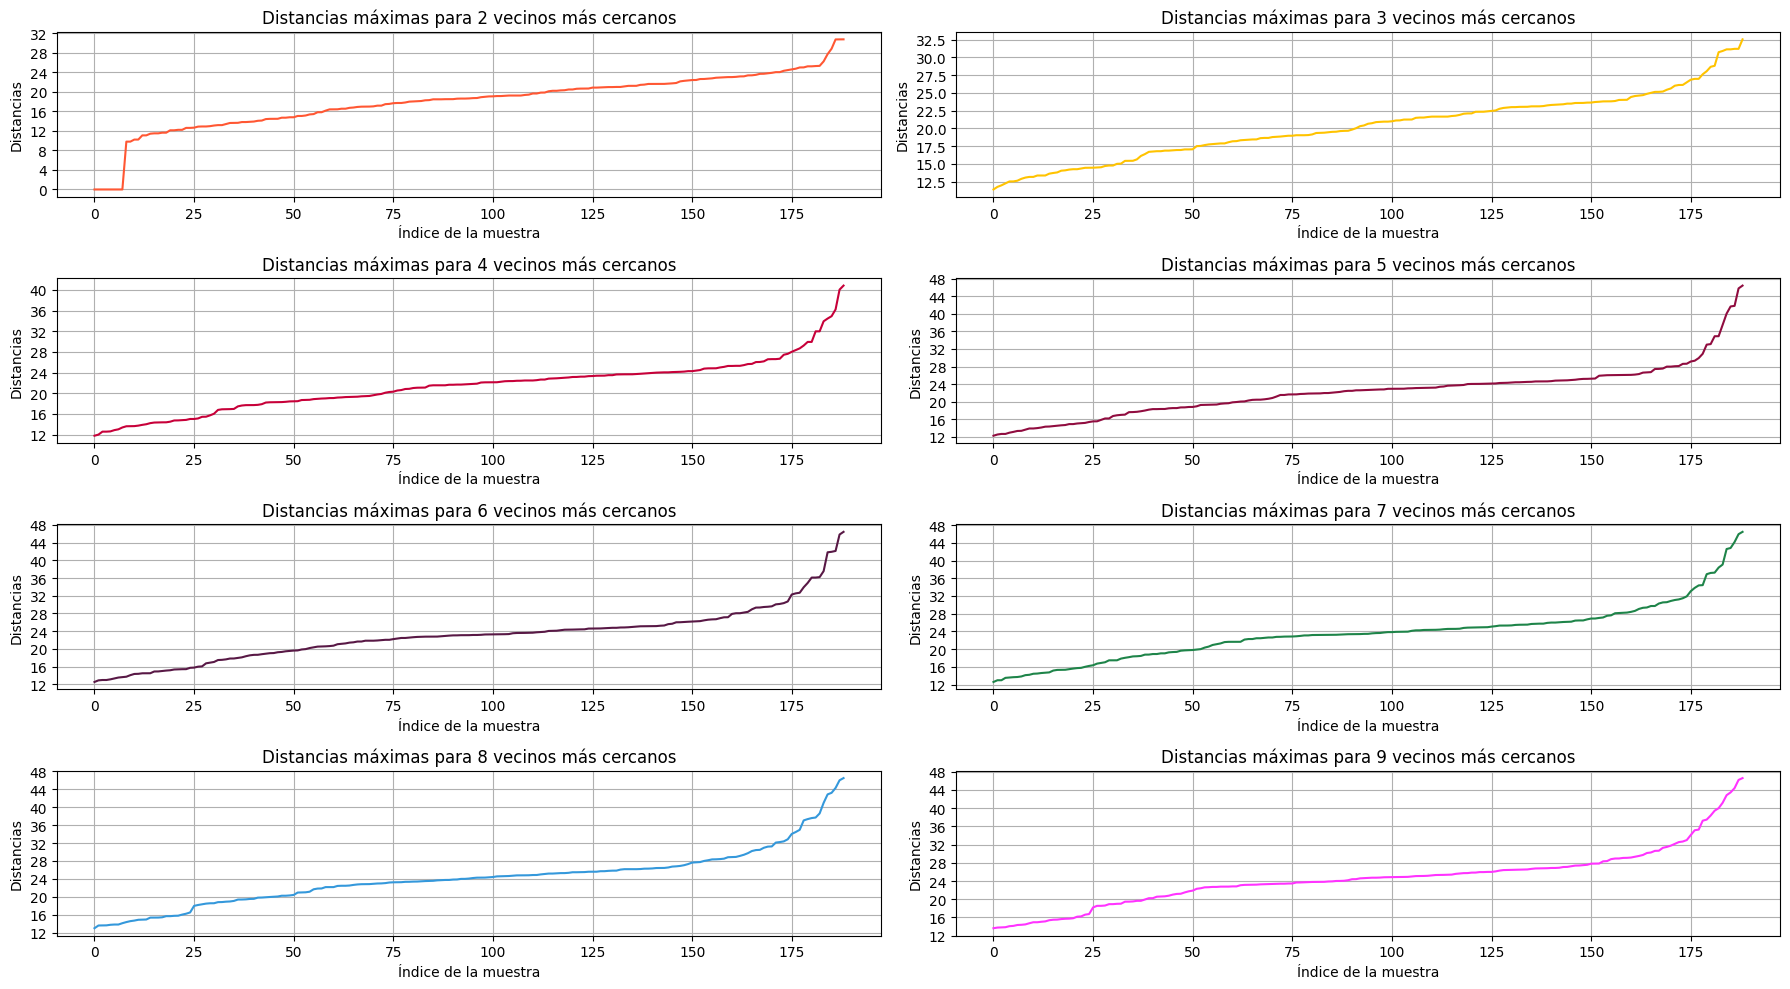

In [5]:
fig, axis = plt.subplots(4, 2, figsize = (18, 10))
colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
            "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC"]
plots_dict = dict(enumerate(range(2, 10)))
for position, n_neighbors in plots_dict.items():
    row = position // 2
    col = position % 2
    ax = axis[row, col]
    distances = neighbors_dict[n_neighbors]
    ax.plot(distances, linestyle = '-', color = colors[position])
    ax.set_xlabel('Índice de la muestra')
    ax.set_ylabel('Distancias')
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
    ax.set_title(f'Distancias máximas para {n_neighbors} vecinos más cercanos')
    ax.grid()
plt.tight_layout()
plt.show()

Para cada plot se obtienen los siguientes resultados por inspección visual (haciendo equivalencias de eps = distancia en quibre y n_min_samples = n_neighbors):

* eps = 10, n_min_samples = 2
* eps = 25, n_min_samples = 2
* eps = 16, n_min_samples = 3
* eps = 16, n_min_samples = 4
* eps = 22, n_min_samples = 5
* eps = 17, n_min_samples = 6
* eps = 22, n_min_samples = 7
* eps = 16, n_min_samples = 8
* eps = 16, n_min_samples = 9

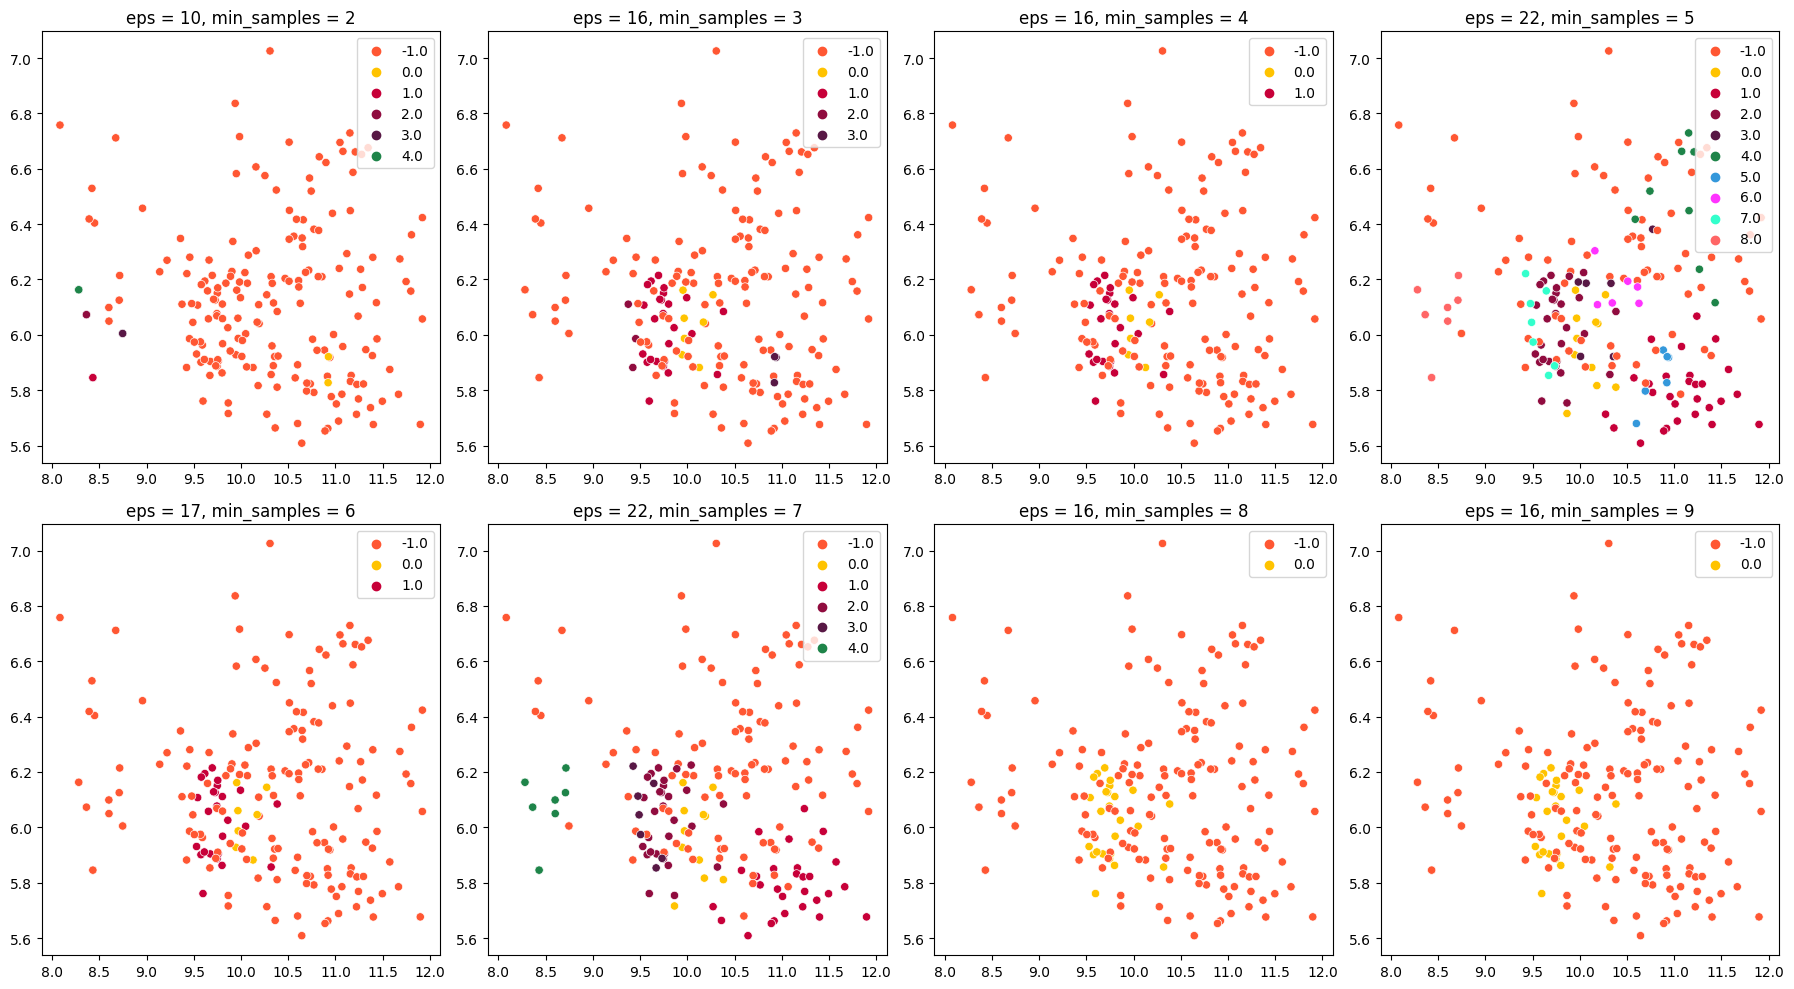

In [8]:
# declarar parametros de dbscan (eps, n_min_samples)
dbscan_params = [(10, 2), (16, 3),
                 (16, 4), (22, 5),
                 (17, 6), (22, 7),
                 (16, 8), (16, 9)]

plot_order = list(range(9))

colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
          "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC",
          "#FF9999", "#66FF99", "#9933FF", "#FFFF66", "#99FFCC", "#FF6666", "#99CC99", "#FF9933",
          "#CC33FF", "#66CCCC", "#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845"]


fig, axis = plt.subplots(2, 4, figsize = (18, 10))
for (eps, n_min_samples), order in zip(dbscan_params, plot_order):
    dbscan = DBSCAN(eps = eps, min_samples = n_min_samples)
    labels = dbscan.fit_predict(X_sc)
    n_labels = len(np.unique(labels))
    X_plot = np.c_[X, labels]
    # Visualizar los resultados
    row = order // 4
    col = order % 4
    ax = axis[row, col]
    sns.scatterplot(x = X_plot[:, 0], y = X_plot[:, 1], hue = X_plot[:, -1], palette = colors[:n_labels], ax = ax)
    ax.set_title(f'eps = {eps}, min_samples = {n_min_samples}')
plt.tight_layout()
plt.show()
